## Lecture 02 - ML Project Workflow: Preprocessing Demonstration

Data pre-processing is a very important stage in machine learning project because how well the model is trained, the meaningfulness of model is based on train data set - a model can have a stastically well done but may not tell a stroy. The preprocessing is therefore a stage where we spend most of time before we make models. The preprocessing is broadly separate into three parts: Data Cleaning, Data Transformation, and Data Reduction. We focus on exploratory data anslysis (EDA) to achieve insights and statistical measure in order to clean, tranform, and reduce the data to get ready for modeling. In this demonstration note, we will walk through to preprocessing using `Housing.csv` data. 

1. A Quick Look at the Data Structure.
2. Exploring Data Analysis (EDA)
3. Feature Engineering
4. Data Split

In [1]:
import pandas as pd

In [2]:
DF = pd.read_csv('Housing.csv')

### 1. A Quick Look at the Data Structure.

In [3]:
DF.shape

(20640, 10)

In [4]:
print(list(DF.columns))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [5]:
DF.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

- There are 10 columns - `longitude`, `latitude`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `median_house_value`, `ocean_proximity`.
- use `shape` to find the size of data - 20640 rows and 10 columns. We are going to treat the problem as a supervised learning problem to predict `meadian_house_value` which we will call it a **target** and the rest **features**, **predictors**, or **attributes**. We call the rows **examples** or **observations**
- use `head` to observe how data looks is structured. However, it does not give descriptions of data. 

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


- use `info` to look for number of rows, and each attribute's type and number of non-null values. 
- notice `total_bedrooms` has only 20,433 non-null values while other attributes have 20,640 non-null values. This means that `total_bedrooms` have 207 missing values or *no observations*. 
- all attributes are numerical except the `ocean_proximity`. We see that this is a text data. 

In [7]:
DF["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
DF.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

The `describe()` method shows a summary of the numerical attributes. The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (see `total_bedrooms`). The std row shows the standard deviation. The 25%, 50%, and 75% rows show the corresponding *percentiles* - the value below which a given percentage of observations in a group of observation falls. 

 We also aggregate data by the group to learn. 

In [9]:
DF.groupby("ocean_proximity").agg({'mean'})

longitude   latitude housing_median_age  total_rooms  \
                       mean       mean               mean         mean   
ocean_proximity                                                          
<1H OCEAN       -118.847766  34.560577          29.279225  2628.343586   
INLAND          -119.732990  36.731829          24.271867  2717.742787   
ISLAND          -118.354000  33.358000          42.400000  1574.600000   
NEAR BAY        -122.260694  37.801057          37.730131  2493.589520   
NEAR OCEAN      -119.332555  34.738439          29.347254  2583.700903   

                total_bedrooms   population  households median_income  \
                          mean         mean        mean          mean   
ocean_proximity                                                         
<1H OCEAN           546.539185  1520.290499  517.744965      4.230682   
INLAND              533.881619  1391.046252  477.447565      3.208996   
ISLAND              420.400000   668.000000  276.600000      2.744420   
NEAR BAY            514.182819  1230.317467  488.616157      4.172885   
NEAR OCEAN          538.615677  1354.008653  501.244545      4.005785   

                median_house_value  
                              mean  
ocean_proximity                     
<1H OCEAN            240084.285464  
INLAND               124805.392001  
ISLAND               380440.000000  
NEAR BAY             259212.311790  
NEAR OCEAN           249433.977427

We often make a boxplot for a visualization.

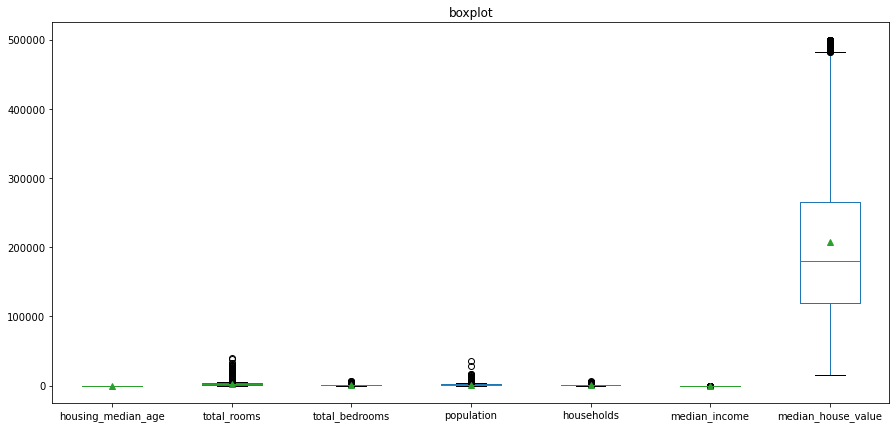

In [10]:
import matplotlib.pyplot as plt
features = DF.columns.tolist()

ax = DF[features[2:9]].plot(kind='box', title='boxplot', showmeans=True,figsize=(15,7))
plt.show()

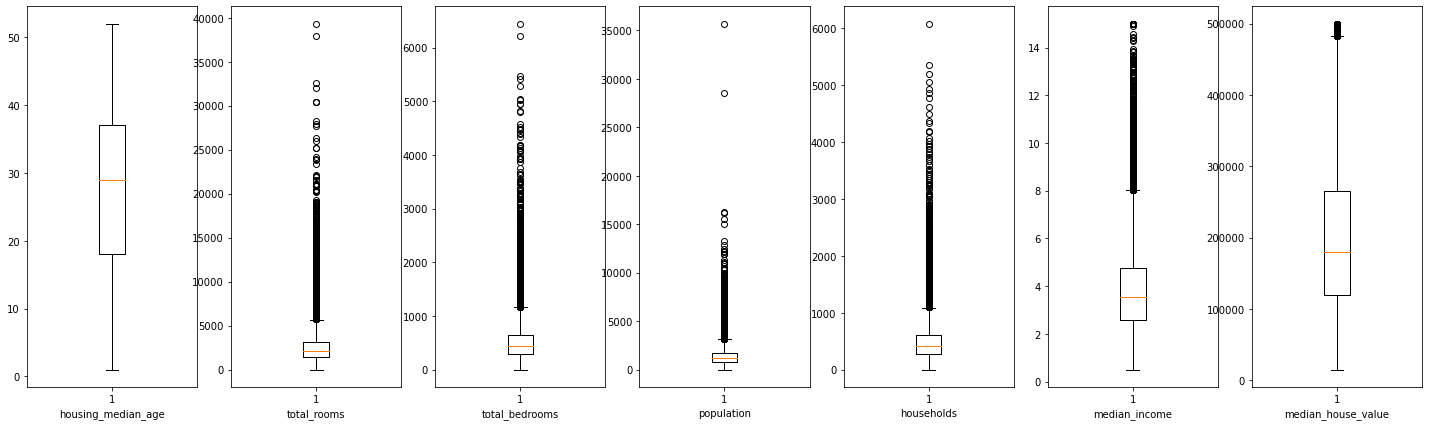

In [11]:
fig, axs = plt.subplots(1, len(features[2:9]), figsize = (25,7),facecolor='white')
for i,feat in zip(range(len(features[2:9])),features[2:9]):
    axs[i].boxplot(DF[feat].dropna())
    axs[i].set_xlabel(feat)
plt.show()

In [12]:
DF.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Only `total_bedrooms` have missing values.

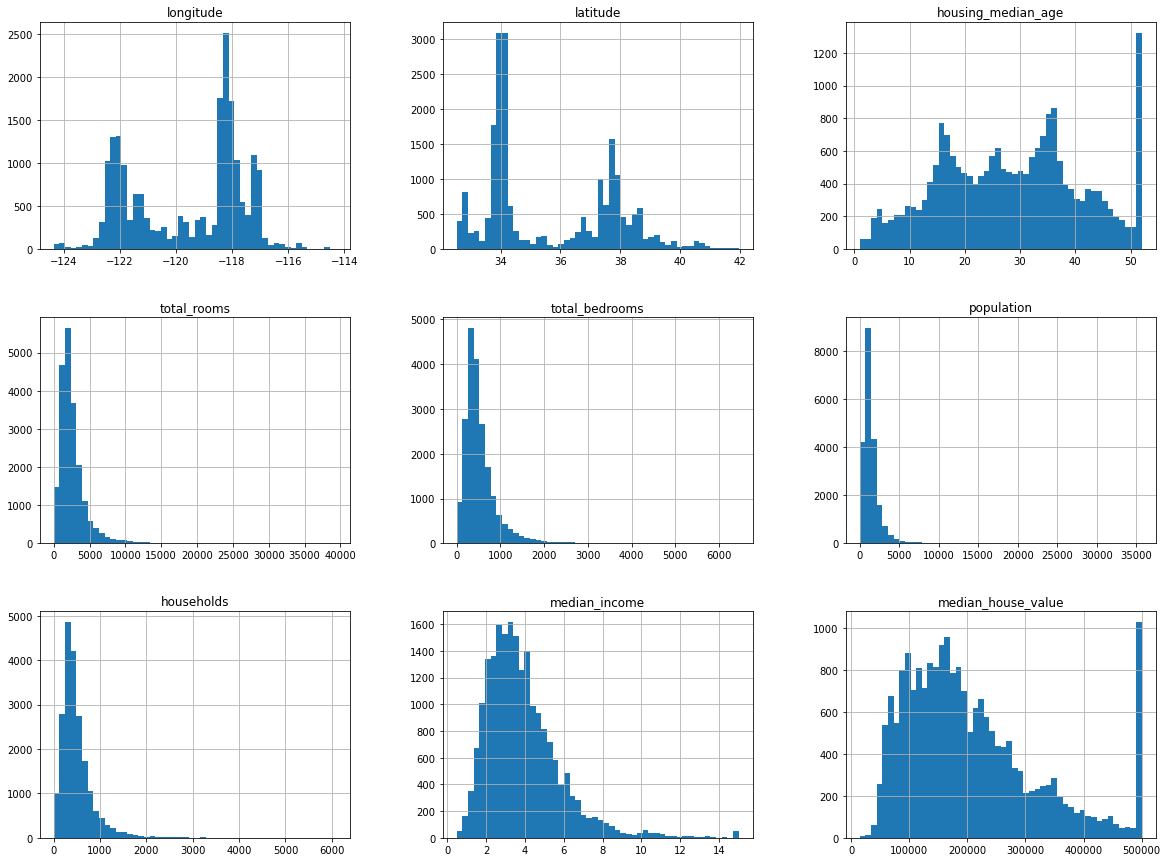

In [13]:
DF.hist(bins=50, figsize=(20,15))
plt.show()

There are few things to notice from histograms:
- The `median_income` is not in U.S. dollars. The data has been scaled and capped at 15 for higher median incomes and at 0.5 for lower median incomes. Working with preprocessed attributes is common in ML and it is not necessarily a problem. However, it is important to understand how the data was computed. 
- The `median_house_value` and `housing_median_age` are capped at 500,000 and 50, respectively. The former may be a serious problem since it is the target attribute and ML algorithms may learn that prices never go beyond that limit. If the goal is to predict `median_house_value` under \\$500,000, there is no problem - we can just use observations under the condition. However, if we have to predict even beyond \\$500,000, there we have two options:
    1. Collect proper labels for the districts whose labels were capped. 
    2. Remove these districts since it will poorly predict beyond \\$500,000 if they are included. (Do not assume that removing \\$500,000 observations without EDA is the right choice!)
- These features have very different scales. 
- Many histograms are *tail heavy*. This may make it a bit harder for some ML algorithms to detect patterns. We need to transform these attributes to have more **bell-shaped distributions**.

### 2. Exploring Data Analysis
2-1. Visualization

Visualization is one of the easiest ways to understand the data structure - it is not only limited to the statistical measurements but also insights to learn about the data itself. 

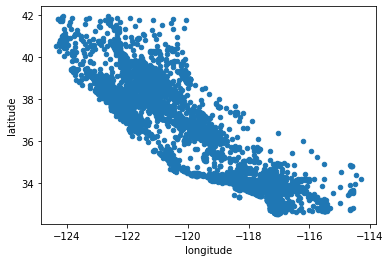

In [14]:
DF.plot(kind="scatter",x="longitude",y="latitude")
plt.show()

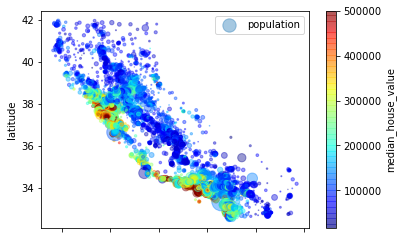

In [15]:
DF.plot(kind="scatter",x="longitude",y="latitude", alpha=0.4, s=DF["population"]/100,
       label="population",c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
plt.show()

The scatter plots made provides us the geomatrical information of data. 
- We can see that the houses are located in California bayside. 
- We can see the poluations of data and understand which part of bayside have high and low median house value. 

3-2. Correlations

We can use `corr()` to compute the *standard correlation coeficient* also known as (*Pearson's r*) between every pair of features. 
- The coefficent ranges from -1 to 1. Closer to 1 means that there is a strong positievv correlation and being closer to 0 means that there is no correlation. 

In [16]:
corr_matrix = DF.corr()

In [17]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

- the `median_house_value` tends to go up when the `median_income` goes up.
- the `median_house_value` tends to go down as `latitude` and `longitude` goes up. 
- the `median_income` has the strongest correlation. 

The correlation study brings important information that can help us to design the preprocessing. We can predict that `median income` will be a major feature in the prediction whereas `population` will have the least impact in the model. 

In [18]:
from pandas.plotting import scatter_matrix

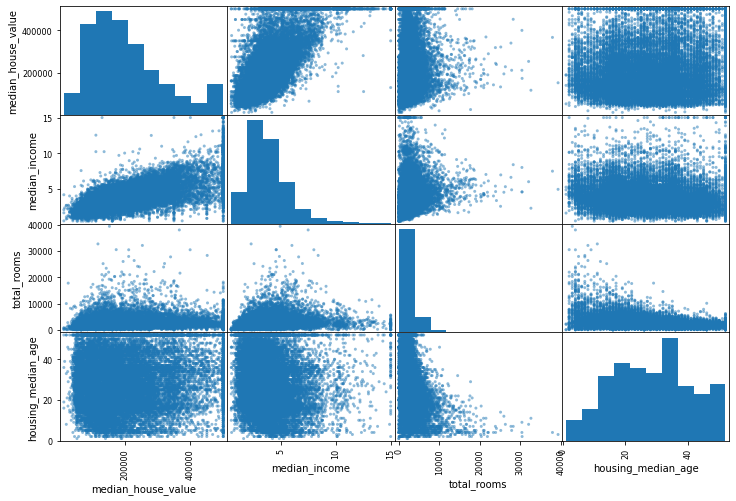

In [19]:
features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(DF[features], figsize=(12,8))
plt.show()

- For details, read the link: https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
- the most promising feature to predict the `median_house_income` is the `median_income`. 

In [20]:
corr = DF.corr()
corr.style.background_gradient(cmap='coolwarm')

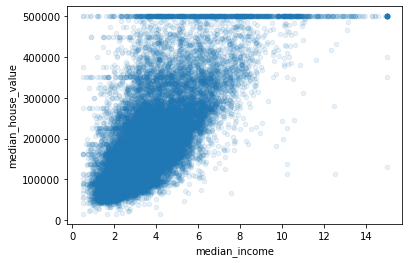

In [21]:
DF.plot(kind="scatter", x="median_income",y="median_house_value", alpha=0.1)
plt.show()

- the correlation is strong. 
- there is a price cap having a horizontal line at \\$500,000.
- Reveals other less obvious straight lines around \\$450,000, \\$350,000, and \\$280,000. 

### 3. Feature Engineering
#### 3-1. New Combinded Features

Consider the following arguement:
1. the `total_rooms` is not useful if the `household` is not known. 
2. the `total_bedrooms` itself is not useful if the `total_rooms` is not known. 
3. the arguments above does not come from ML experience, but more from how well deeply we about the data and the case. 

In [22]:
DF["rooms_per_household"]=DF["total_rooms"]/DF["households"]
DF["bedrooms_per_room"]=DF["total_bedrooms"]/DF["total_rooms"]
DF["population_per_household"]=DF["population"]/DF["households"]

In [23]:
corr_matrix=DF.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

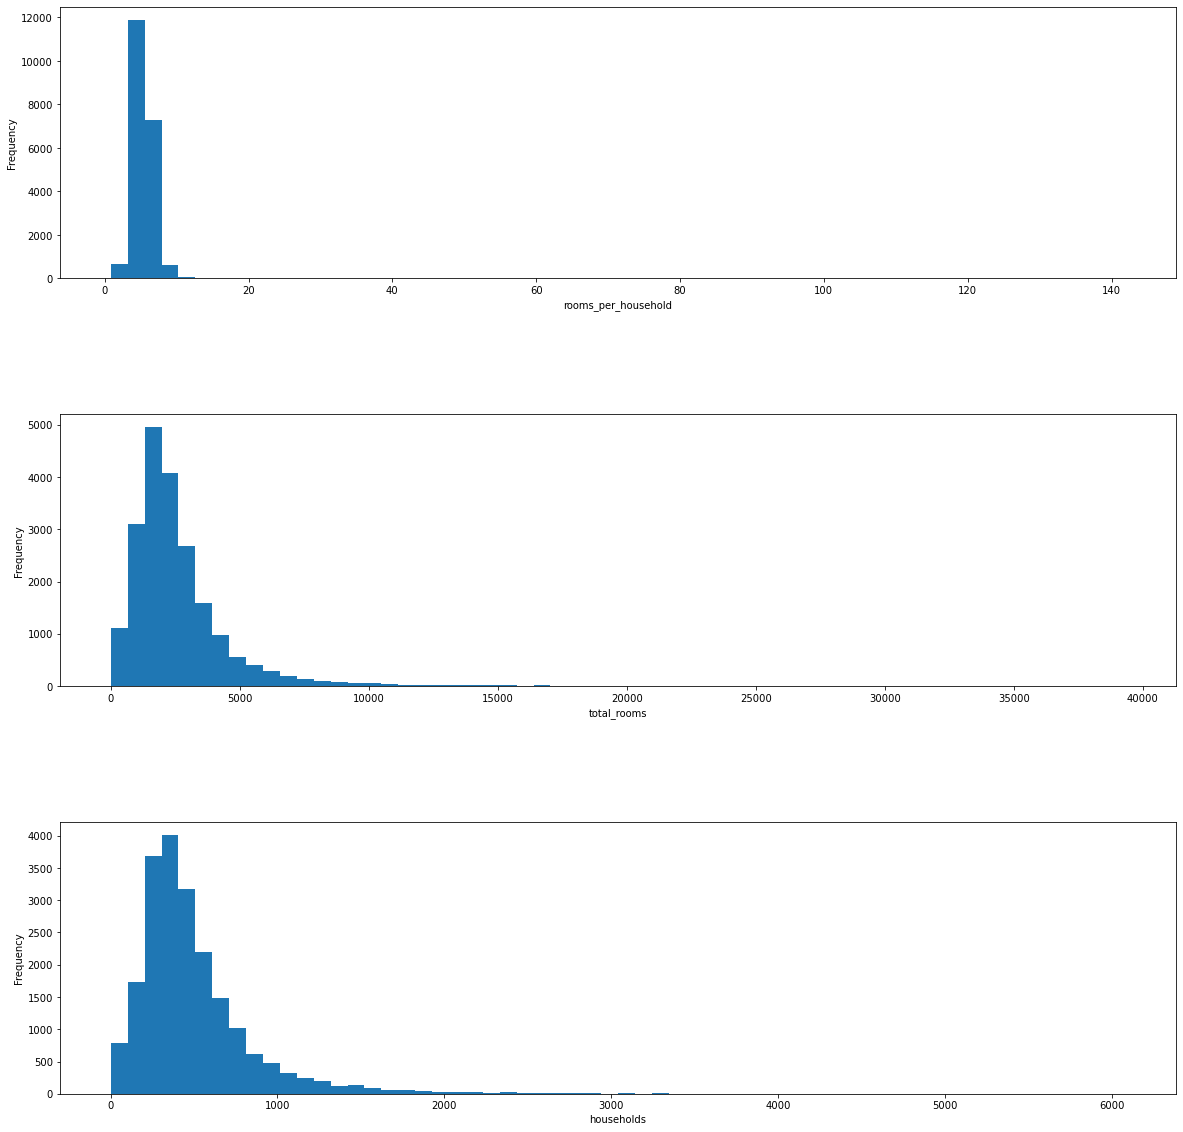

In [24]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
plt.subplots_adjust(hspace=0.5)

n, bins, patches = ax1.hist(DF["rooms_per_household"],bins=60)
ax1.set_xlabel('rooms_per_household')
ax1.set_ylabel('Frequency')

n, bins, patches = ax2.hist(DF["total_rooms"],bins=60)
ax2.set_xlabel('total_rooms')
ax2.set_ylabel('Frequency')

n, bins, patches = ax3.hist(DF["households"],bins=60)
ax3.set_xlabel("households")
ax3.set_ylabel('Frequency')
plt.show()

- The `bedrooms_per_room` is much more correlated with the `median_house_value` than the `total_rooms` and the `total_bedrooms`. 
- Houses with a lower bedroom/room ratio tend to be more expensive. 
- The `rooms_per_household` is much informative than the `total_rooms`. 
- Bigger the house is, much expensive the house is. 
- This exploration does not have to be absolutely thorough - the point is to start off on the right foot and quickly gain insights that will help us to get a first reasonably good prototype. This is an iterative process. 

#### 3-2. Data Cleaning

In [25]:
DF.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

Missing Value Handling:
- Impute with averge, median, any specific number (.e.g, 0), or drop 
- Use `fillna()` to fill in missing values
- If we decided to drop, we must consider dropping the column or the rows. 
    - use `dropna()` to delete all rows for having a column with missing values. 
    - use `drop()` to delete the column. 

In [26]:
DF.dropna(subset=['total_bedrooms']).shape

(20433, 13)

In [27]:
DF.drop("total_bedrooms",axis=1).shape

(20640, 12)

In [28]:
median=DF["total_bedrooms"].median()
average=DF["total_bedrooms"].mean()
print("median is",median)
print("average is", average)

median is 435.0
average is 537.8705525375618


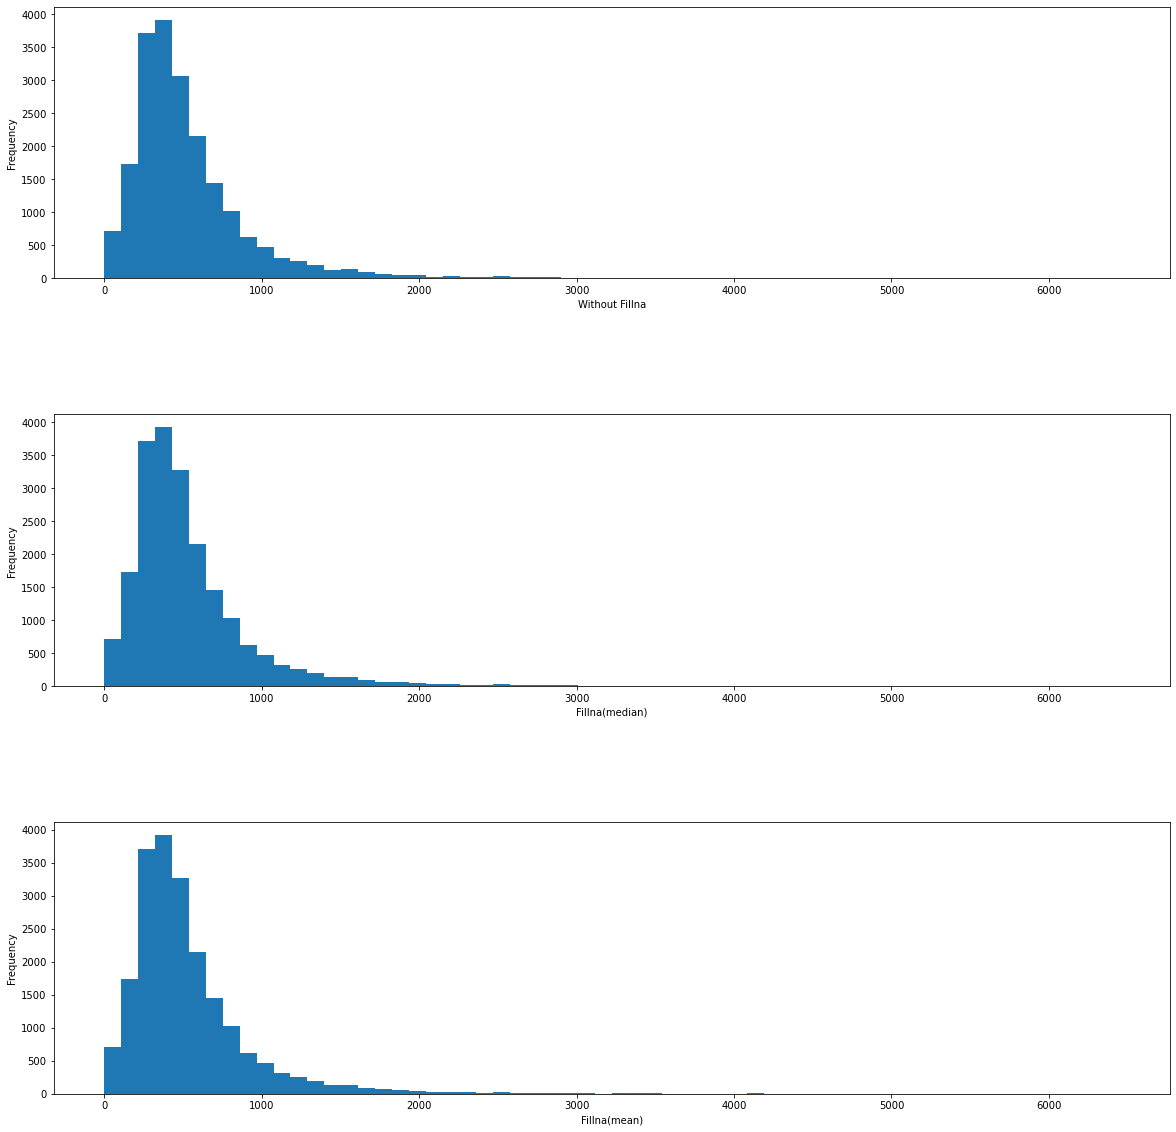

In [29]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
plt.subplots_adjust(hspace=0.5)

n, bins, patches = ax1.hist(DF["total_bedrooms"],bins=60)
ax1.set_xlabel('Without Fillna')
ax1.set_ylabel('Frequency')

n, bins, patches = ax2.hist(DF["total_bedrooms"].fillna(median),bins=60)
ax2.set_xlabel('Fillna(median)')
ax2.set_ylabel('Frequency')

n, bins, patches = ax3.hist(DF["total_bedrooms"].fillna(average),bins=60)
ax3.set_xlabel('Fillna(mean)')
ax3.set_ylabel('Frequency')
plt.show()

The **Kolmogorov-Smirnov test (KS-Test)** is a nonparametric test of the equality of continuous or discontinous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution or to compare two samples. 

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case).

In [30]:
from scipy.stats import ks_2samp
ks_2samp(DF["total_bedrooms"],DF["total_bedrooms"].fillna(median))

KstestResult(statistic=0.01002906976744189, pvalue=0.2487036882495567)

In [31]:
ks_2samp(DF["total_bedrooms"].fillna(average),DF["total_bedrooms"])

KstestResult(statistic=0.01002906976744189, pvalue=0.2487036882495567)

Under the null hypothesis the two distributions are identical. If the K-S statistic is small or the p-value is high (greater than the significance level, say 5%), then we cannot reject the hypothesis that the distributions of the two samples are the same. Conversely, we can reject the null hypothesis if the p-value is low.

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = DF.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [34]:
housing_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [35]:
X = imputer.transform(housing_num)
housing_tr=pd.DataFrame(X, columns=housing_num.columns)

In [36]:
housing_tr.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  rooms_per_household  bedrooms_per_room  \
count        20640.000000         20640.000000       20640.000000   
mean        206855.816909             5.429000           0.212940   
std         115395.615874             2.474173           0.057700   
min          14999.000000             0.846154           0.100000   
25%         119600.000000             4.440716           0.175708   
50%         179700.000000             5.229129           0.203162   
75%         264725.000000             6.052381           0.239273   
max         500001.000000           141.909091           1.000000   

       population_per_household  
count              20640.000000  
mean                   3.070655  
std                   10.386050  
min                    0.692308  
25%                    2.429741  
50%                    2.818116  
75%                    3.282261  
max                 1243.333333

#### 3-3 Handling Categorical and Text Data:
- Most ML algorithms prefer to work with numbers. Therefore, converting text labels to numbers may bring meaningful information about data than just dropping. 
- The `ocean_proximity` is in text and we cau use `LabelEncoder()` to convert the text to numbers. 

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = DF["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [38]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


- `OneHotEncoder()` encorder converts inteter categorical values into one-hot vectors. 
- Note that `fit_transform()` expects 2-D array and we need to reshape `DF_cat_encoded` because it is in 1-D array. 

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
encoder=OneHotEncoder()
housing_cat_encoded_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_encoded_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [41]:
housing_cat_encoded_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

- We get a matrix with 5 columns with 0 and 1 per row. 
- We can use `LabelBinarizer()` to do the same work in one shot. 

In [42]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_encoded_1hot=encoder.fit_transform(housing_cat_encoded)
housing_cat_encoded_1hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [43]:
housing_Encoded=pd.DataFrame(housing_cat_encoded_1hot)

In [44]:
housing_Encoded.head(5)

0  1  2  3  4
0  0  0  0  1  0
1  0  0  0  1  0
2  0  0  0  1  0
3  0  0  0  1  0
4  0  0  0  1  0

In [45]:
housing_Encoded.columns=['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN']

In [46]:
housing_Encoded.head(5)

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          0       0       0         1           0
1          0       0       0         1           0
2          0       0       0         1           0
3          0       0       0         1           0
4          0       0       0         1           0

In [47]:
DF_final = pd.concat([housing_num, housing_Encoded], axis=1)

In [48]:
DF_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  int64  
 3   total_rooms               20640 non-null  int64  
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  int64  
 6   households                20640 non-null  int64  
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  int64  
 9   rooms_per_household       20640 non-null  float64
 10  bedrooms_per_room         20433 non-null  float64
 11  population_per_household  20640 non-null  float64
 12  <1H OCEAN                 20640 non-null  int64  
 13  INLAND                    20640 non-null  int64  
 14  ISLAND

#### 3-4 Feature Scaling
One of the most important transformations need to aaply to data is *feature scaling*. With few exceptions, ML algorithms do not perform well when the input numerial attributes have very different scales. 

Two common ways: *Min-Max Scaling* and *standarization*

***Min-Max Scaling*** (**Normalization**): values are shifted and rescaled ending up from 0 to 1. Scikit-Learn provies a transformer called `MinMaxScaler`. 

***Standarization***: Does not have specific range values and much less affective to outliers. Scikit-Learn provies a transformer called `StandardScaler`. 

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

scaler = StandardScaler()
scaled_data = scaler.fit_transform(housing_num)

In [50]:
DF_final = pd.concat([housing_num, housing_Encoded], axis=1)

In [51]:
DF_final.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  rooms_per_household  bedrooms_per_room  \
count        20640.000000         20640.000000       20433.000000   
mean        206855.816909             5.429000           0.213039   
std         115395.615874             2.474173           0.057983   
min          14999.000000             0.846154           0.100000   
25%         119600.000000             4.440716           0.175427   
50%         179700.000000             5.229129           0.203162   
75%         264725.000000             6.052381           0.239821   
max         500001.000000           141.909091           1.000000   

       population_per_household     <1H OCEAN        INLAND        ISLAND  \
count              20640.000000  20640.000000  20640.000000  20640.000000   
mean                   3.070655      0.442636      0.317393      0.000242   
std                   10.386050      0.496710      0.465473      0.015563   
min                    0.692308      0.000000      0.000000      0.000000   
25%                    2.429741      0.000000      0.000000      0.000000   
50%                    2.818116      0.000000      0.000000      0.000000   
75%                    3.282261      1.000000      1.000000      0.000000   
max                 1243.333333      1.000000      1.000000      1.000000   

           NEAR BAY    NEAR OCEAN  
count  20640.000000  20640.000000  
mean       0.110950      0.128779  
std        0.314077      0.334963  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

In [52]:
DF_final.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   rooms_per_household  bedrooms_per_room  population_per_household  \
0             6.984127           0.146591                  2.555556   
1             6.238137           0.155797                  2.109842   
2             8.288136           0.129516                  2.802260   
3             5.817352           0.184458                  2.547945   
4             6.281853           0.172096                  2.181467   

   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0          0       0       0         1           0  
1          0       0       0         1           0  
2          0       0       0         1           0  
3          0       0       0         1           0  
4          0       0       0         1           0

In [53]:
import numpy as np

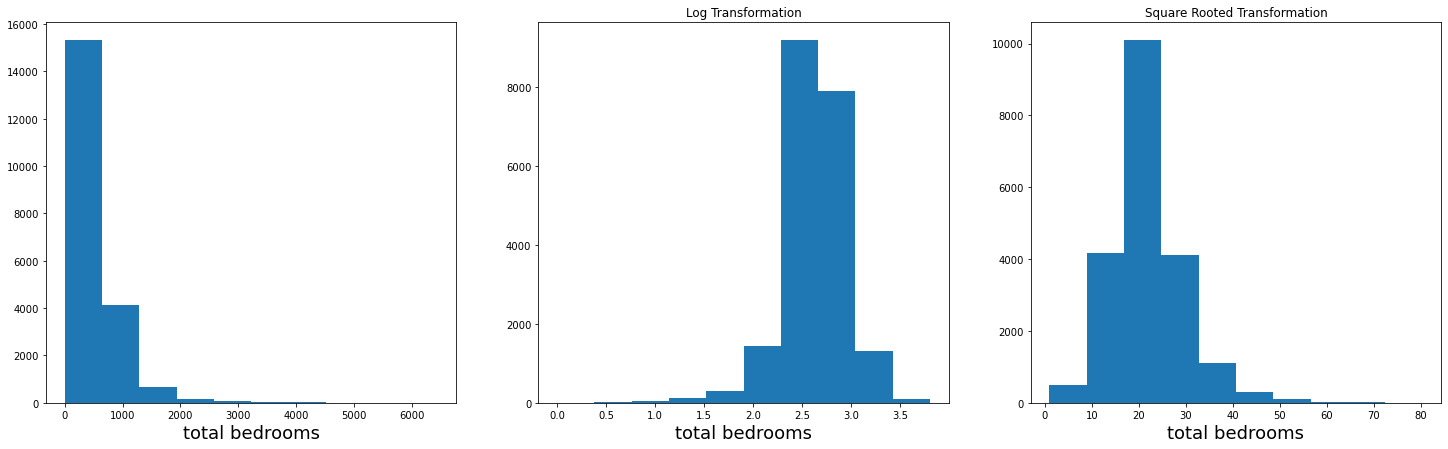

In [54]:
fig, axs = plt.subplots(1, 3, figsize = (25,7),facecolor='white')
axs[0].hist(DF_final['total_bedrooms'])
axs[0].set_xlabel('total bedrooms',fontsize=18)
axs[1].hist(np.log10(DF_final['total_bedrooms']))
axs[1].set_xlabel('total bedrooms',fontsize=18)
axs[1].set_title('Log Transformation')
axs[2].hist((np.sqrt(DF_final['total_bedrooms'])))
axs[2].set_xlabel('total bedrooms',fontsize=18)
axs[2].set_title('Square Rooted Transformation')
plt.show()

#### Drop outliers

In [55]:
DF['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

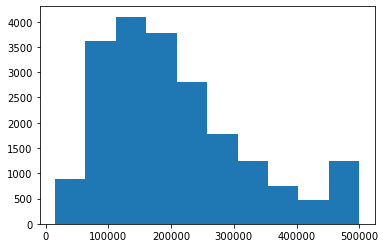

In [56]:
plt.hist(DF['median_house_value'])
plt.show()

In [57]:
house_value=np.sqrt(DF_final['median_house_value'])

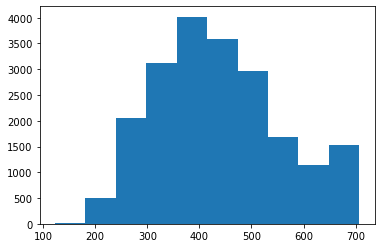

In [58]:
plt.hist(house_value)
plt.show()

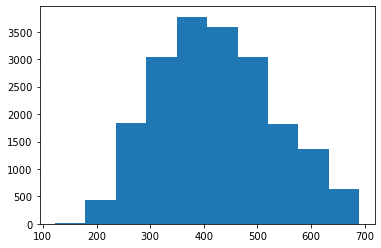

In [59]:
plt.hist(house_value[house_value<690])
plt.show()

In [60]:
DF_final['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [61]:
DF_final['median_house_value']=np.sqrt(DF_final['median_house_value'])

In [62]:
DF_final=DF_final[DF_final['median_house_value']<690]
print(DF_final.shape, DF.shape)

(19542, 17) (20640, 13)


### 4. Data Split

In [63]:
import numpy as np
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(DF_final, test_size=0.2, random_state=42)

In [64]:
print(len(train_set),"train +", len(test_set),"test")

15633 train + 3909 test


- `train_test_split` is the simplest function to split data. 
- `random_state`: allows to set the random generator seed, pass it multiple datasets with an identical number of rows,  and split them on the same indices. 